**Name**: Simon Giles Kristensen 

**Student ID**: 182414

**Course**: CCMVI2085U - Machine Learning for Predictive Analytics in Business  

## Section 1 Data Loading, Pre-Processing and Visualization 50%

### Question 1.1: 
Import the dataset `used_car_ads.csv` into your Jupyter notebook, name it `df`, and show the last 8 rows of `df`.

In [1]:
# import relevant library
import pandas as pd

# read the dataset and save it as df
df = pd.read_csv("used_car_ads.csv")

C:\Users\simon\AppData\Local\Temp\ipykernel_35312\137055534.py:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("used_car_ads.csv")


In [2]:
# show the last 8 rows
df.tail(8)

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,Fuel_type,Price,Seat_num,Door_num
268247,Volvo,V50,96_9,96_9$$524,2018,5,Silver,2009.0,Estate,94000,2.4L,Automatic,Diesel,4250,5.0,5.0
268248,Volvo,V50,96_9,96_9$$525,2018,5,Silver,2004.0,Estate,111000,2.4L,Automatic,Petrol,2895,5.0,5.0
268249,Volvo,V50,96_9,96_9$$526,2018,1,Blue,2009.0,Estate,107000,2.0L,Manual,Diesel,3684,5.0,5.0
268250,Westfield,Sport,97_1,97_1$$1,2018,5,Yellow,2006.0,Convertible,1800,2.2L,Manual,Petrol,8750,2.0,NaN
268251,Westfield,Sport,97_1,97_1$$2,2018,5,Yellow,2006.0,Convertible,2009,NaN,Manual,NaN,7995,NaN,NaN
268252,Zenos,E10,99_1,99_1$$1,2018,3,Red,2016.0,Convertible,6,2.0L,Manual,Petrol,27950,2.0,NaN
268253,Zenos,E10,99_1,99_1$$2,2018,3,Green,2016.0,Convertible,1538,2.0L,Manual,Petrol,34950,2.0,NaN
268254,Zenos,E10,99_1,99_1$$3,2018,5,Grey,2016.0,Convertible,500,2.3L,Manual,Petrol,29995,2.0,NaN


**Explanation:**  
We start by importing the dataset and load into a Dataframe `df` using pandas library. The `df.tail(8)` function displays the last 8 observations from the data. 

### Question 1.2:
Convert all column names in the `df` to lowercase

In [3]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()

In [4]:
# print column
df.columns

Index(['maker', 'genmodel', 'genmodel_id', 'adv_id', 'adv_year', 'adv_month',
       'color', 'reg_year', 'bodytype', 'runned_miles', 'engin_size',
       'gearbox', 'fuel_type', 'price', 'seat_num', 'door_num'],
      dtype='object')

**Explanation:**  
All column names have been converted to lowercase using `str.lower()` and printed to verify the conversion.

### Question 1.3: 
Show the dimension and variable data types of the `df`

In [5]:
# show shape of the dataframe
df.shape

(268255, 16)

In [6]:
# check data types of the variables
df.dtypes

maker            object
genmodel         object
genmodel_id      object
adv_id           object
adv_year          int64
adv_month         int64
color            object
reg_year        float64
bodytype         object
runned_miles     object
engin_size       object
gearbox          object
fuel_type        object
price            object
seat_num        float64
door_num        float64
dtype: object

**Explanation:**  
We check the shape to see how many rows and columns the dataset has, which is 268,255 rows (used car listing) and 16 columns (variables). Then we look at the data types to understand what kind of values each variable is stored as. The data types that are identified are `object` `int64` `float64`

### Question 1.4: 
The `price` column is currently of object type, which is not appropriate for numerical analysis. Investigate the underlying cause and convert the `price` column to a float type.

**Explanation:** 
I tried to convert the column using `astype(float)` and got an `Error`. This raised an `Error`, revealing that one of the values was the string `"Uknown"`. Because of this string the entire column got stored as the datatype `object`.
To fix the issue, I replaced `"Uknown"` with `None`, which pandas treats as a missing value. Then the verifed the conversion using `dtypes` which confirmed that the columns is now stored as `float`.


In [7]:
# fix invalid value based on error message Uknown
df["price"] = df["price"].replace("Uknown", None)

In [8]:
# Convert to float
df["price"] = df["price"].astype(float)


In [9]:
# confirm for succesful conversion
df["price"].dtypes

dtype('float64')

### Question 1.5: 
The `runned_miles` column is also of object type, which is unsuitable for representing mileage values.Investigate the underlying cause and convert the `runned_miles` column to an integer type.

**Explanation:**  
Similar to Question 1.4, I followed the same approach. I tried to convert the `runned_miles` column from `object` to `int` using `astype(int)` and got a `Error`. The `Error` revealed that some of the values were missing `NaN`, which caused the column to be stored as `object` instead of `int`. When I attempted the conversion again, I ran into another error due to a string value: `"1 mile"`.  

To fix the issue, I replaced `"1 mile"` with `None`, which pandas treats as a missing value. Then I removed any remaining missing values using `dropna()`. After that i converted the column using `astype(int)` and `dtype` to verify that the conversion was successful. The conversion of the column is now is now verifed in `cell 13`

In [10]:
# fix invalid value based on error message 1 mile
df["runned_miles"] = df["runned_miles"].replace("1 mile", None)

In [11]:
# remove any remaining missing values
df = df.dropna(subset=["runned_miles"])



In [12]:
# convert to integer
df["runned_miles"] = df["runned_miles"].astype(int)

In [13]:
# confirm conversion
df["runned_miles"].dtypes

dtype('int64')

**Explanation:**  
Similar to Question 1.4, I followed the same approach. I tried to convert the `runned_miles` column from `object` to `int` using `.astype(int)` and got a `ValueError`. The error revealed that some of the values were missing (`NaN`), which caused the column to be stored as `object` instead of `int`. When I attempted the conversion again, I ran into another error due to a string value: `"1 mile"`.  

To fix the issue, I replaced `"1 mile"` with `None`, which pandas treats as a missing value. Then I removed any remaining missing values using `.dropna()`.After that, I re-applied `astype(int)` and used `.dtype` and `.head()` to verify that the conversion was successful. The conversion of the column is now is now verifed in cell 13 and is now `int`ready for numerical analysis.


### Question 1.6: 
The `engin_size` column is currently of object type, which is not suitable for numerical analysis. Please remove the "L" suffix from its values and convert the column to a float type.

In [14]:
# remove L
df["engin_size"] = df["engin_size"].str.replace("L", "")

In [15]:
#convert to float
df["engin_size"] = df["engin_size"].astype(float)

In [16]:
# confirm conversion
df["engin_size"].dtype

dtype('float64')

**Explanation:**  
The question stated that the values in the `engin_size` column contain a trailing `"L"` that needs to be removed. I followed the instruction by using `str.replace("L", "")` (learned from the course literature) to remove the `"L"` suffix. After that, I converted the column to `float` using `astype(float)`. The column is now correctly stored as the datatype `float`.


### Question 1.7: The `reg_year` column is displayed as float type, which is not appropriate for representing registration years. Please convert `reg_year` to an integer type.

In [17]:
# convert registration year to integer
df["reg_year"] = df["reg_year"].astype(int)

In [18]:
# confirm conversion
df["reg_year"].dtype

dtype('int64')

**Explanation:** 
The `reg_year` column was stored as `float`, but registration years should be represented as whole numbers. To fix this, I converted the column to `int` using `astype(int)`. The column is now of type `int`.

### Question 1.8: 
If there are any missing values in the `df`, calculate and report the percentage of missing values for each column. Then, remove all rows that contain any missing values.

In [19]:
# show missing in the columns
df.isna().sum()

maker               0
genmodel            0
genmodel_id         0
adv_id              0
adv_year            0
adv_month           0
color           21692
reg_year            0
bodytype          927
runned_miles        0
engin_size       1977
gearbox           144
fuel_type         397
price            1135
seat_num         6312
door_num         4468
dtype: int64

In [20]:
#percentage of missing values for each column
(df.isna().mean() * 100)

maker           0.000000
genmodel        0.000000
genmodel_id     0.000000
adv_id          0.000000
adv_year        0.000000
adv_month       0.000000
color           8.126110
reg_year        0.000000
bodytype        0.347266
runned_miles    0.000000
engin_size      0.740610
gearbox         0.053944
fuel_type       0.148721
price           0.425186
seat_num        2.364559
door_num        1.673772
dtype: float64

In [21]:
# remove rows with any missing values
df = df.dropna()

In [22]:
# confirm that all missing values are gone
df.isna().sum()

maker           0
genmodel        0
genmodel_id     0
adv_id          0
adv_year        0
adv_month       0
color           0
reg_year        0
bodytype        0
runned_miles    0
engin_size      0
gearbox         0
fuel_type       0
price           0
seat_num        0
door_num        0
dtype: int64

**Explanation:**  
I used `isna().sum()` to check how many missing values each column had, and `mean() * 100` to calculate the percentage.  Then I removed all rows with missing data using `dropna()`.  
At the end i confirmed the that all missing values was gone using `isna().sum()`  


### Question 1.9:
Show the top 10 car brands (i.e., column `makers`) by count in the `df` and plot them as a bar chart. 

In [23]:
# count car brands
brand_counts = df["maker"].value_counts()


In [24]:
# select the top 10 and show them.
top_10_makers = brand_counts.head(10)
print(top_10_makers)

maker
Ford          22889
Audi          19943
Vauxhall      17985
Volkswagen    15364
BMW           13703
Nissan        11470
Peugeot        9853
Land Rover     8976
Citroen        8829
Toyota         8617
Name: count, dtype: int64


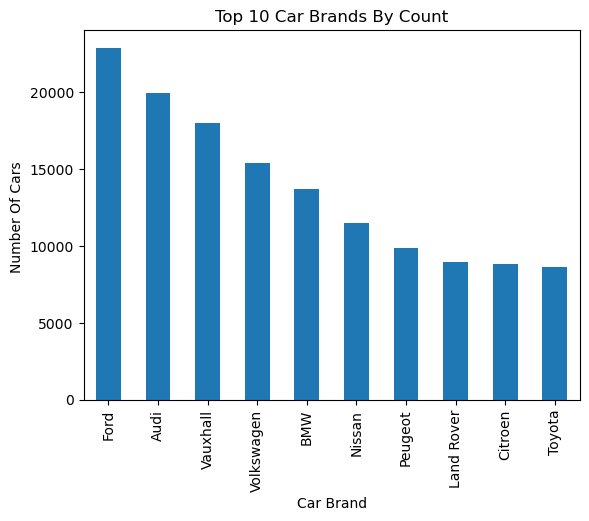

In [25]:
#Python library for data visualization 
import matplotlib.pyplot as plt

# plot as a bar chart
top_10_makers.plot(kind = "bar")
plt.title("Top 10 Car Brands By Count")
plt.xlabel("Car Brand")
plt.ylabel("Number Of Cars ")
plt.show()

**Explanation:**  
I used `value_counts()` on the `maker` column to count how often each car brand appears. Then I selected the top 10 using `head(10)`, and visualized them with `plot(kind="bar")` using `matplotlib` library. The chart visualise the 10 most common car brands and the number of cars that in the dataset.

### Question 1.10: 
Extract a subset of `df` that includes only the top 10 car brands (maker), and within those brands, only keep rows where the corresponding `genmodel` appears in at least 1000 observations. Save the resulting subset back to `df`.

In [26]:
# count how many times maker appears
maker_counts = df["maker"].value_counts()
print(top_10_makers)

maker
Ford          22889
Audi          19943
Vauxhall      17985
Volkswagen    15364
BMW           13703
Nissan        11470
Peugeot        9853
Land Rover     8976
Citroen        8829
Toyota         8617
Name: count, dtype: int64


In [27]:
# get top 10 maker names
top_10_makers = maker_counts.head(10).index

# keep only rows with top 10 makers
df = df[df["maker"].isin(top_10_makers)]

# count genmodel frequency within top 10 makers
common = df["genmodel"].value_counts()

# keep only genmodels with at least 1000 rows
df = df[df["genmodel"].isin(common[common >= 1000].index)]

In [28]:
#confrim filtering 
df["maker"].value_counts().head(10)

maker
Ford          17547
Vauxhall      12498
Audi           8950
Nissan         8892
Volkswagen     7927
BMW            6475
Land Rover     4777
Citroen        3858
Toyota         3112
Peugeot        2402
Name: count, dtype: int64

**Explanation:**  
I used `value_counts()` to get the top 10 car `maker`, then I filtered with `isin()`. Finally, I kept `genmodel` values with at least 1,000 entries.

### Question 1.11: 
Extract a subset of `df` that includes only the top 5 most frequent `bodytype` values based on their counts. Save the resulting subset back to `df`.

In [29]:
# count how many times each bodytype appears
body_counts = df["bodytype"].value_counts()
print(body_counts)

bodytype
Hatchback          39044
SUV                18036
MPV                 6532
Saloon              4379
Estate              4233
Coupe               2441
Pickup              1020
Convertible          658
Panel Van             66
Car Derived Van       26
Combi Van              3
Name: count, dtype: int64


In [30]:
# save count as body_counts
body_counts = df["bodytype"].value_counts()

# keep only rows where bodytype is in the top 5
top_5_bodytypes = body_counts.head(5).index

# filter to keep only those top 5 bodytypes
df = df[df["bodytype"].isin(top_5_bodytypes)]

In [31]:
# check result after filtering
df["bodytype"].value_counts()

bodytype
Hatchback    39044
SUV          18036
MPV           6532
Saloon        4379
Estate        4233
Name: count, dtype: int64

**Explanation:**  
I used `value_counts().head(5).index` to get the top 5 bodytypes,  
then filtered `df` using `isin()` to keep only those rows.


### Question 1.12: 
Identify the top 10 most frequent values in the `color` column. Then, update the column by keeping only these top 10 colors, and replacing all other values with the label `Others`.

In [32]:
# count colors and get the top 10
color_counts = df["color"].value_counts()
top_10_colors = color_counts.head(10).index



In [33]:
# replace all other colors with 'Others'
df.loc[~df["color"].isin(top_10_colors), "color"] = "Others"


In [34]:
# confirm filtering
df["color"].value_counts()

color
Black     14178
Silver    12276
Blue      11283
Grey      10695
White      9009
Red        7954
Others     2073
Green      1655
Brown      1225
Orange     1019
Yellow      857
Name: count, dtype: int64

**Explanation:**  
I used `value_counts()` & `head(10).index` to get the top 10 colors.  
Then used `isin()` with `loc[]` to replace all other colors with `"Others"`

### Question 1.13: 
Clean the `fuel_type` column by merging all values that contain the terms `Hybrid`, `Bi`, or `Electric` into a single category labeled `Hybrid/Electric`. Then, remove all rows from the `df` where the `fuel_type` is not one of the following: `Petrol`, `Diesel`, or `Hybrid/Electric`.

In [35]:
# Count how many times each fuel type appears
df['fuel_type'].value_counts()

fuel_type
Diesel                             36913
Petrol                             34361
Hybrid  Petrol/Electric              763
Hybrid  Petrol/Electric Plug-in       79
Petrol Plug-in Hybrid                 51
Petrol Hybrid                         19
Bi Fuel                               13
Hybrid  Diesel/Electric               12
Diesel Hybrid                          8
Hybrid  Diesel/Electric Plug-in        3
Petrol Ethanol                         1
Electric                               1
Name: count, dtype: int64

In [36]:
# replace the terms with Hybrid/Electric
df["fuel_type"] = df["fuel_type"].replace({
    "Hybrid": "Hybrid/Electric",
    "Plugin Hybrid": "Hybrid/Electric",
    "Bi Fuel": "Hybrid/Electric",
    "Electric": "Hybrid/Electric"
})



In [37]:
# keep only rows with allowed fuel types
df = df[df["fuel_type"].isin(["Petrol", "Diesel", "Hybrid/Electric"])]



In [38]:
# confirm filtering
df["fuel_type"].value_counts()


fuel_type
Diesel             36913
Petrol             34361
Hybrid/Electric       14
Name: count, dtype: int64

**Explanation:**  
We merge "Hybrid", "Plugin Hybrid", "Bi Fuel", and "Electric" into one group using `replace()`. Then we filter out all other rows besides ["Petrol", "Diesel", "Hybrid/Electric"] using `isin()` and confirm the filtering using `value_counts()`


### Question 1.14: 
Replace all occurrences of `Semi-Automatic` with `Automatic` in the `gearbox` column.

In [39]:
# replace Semi Automatic with Automatic
df["gearbox"] = df["gearbox"].replace("Semi-Automatic", "Automatic")

In [40]:
# confirm replacement
df["gearbox"].value_counts()

gearbox
Manual       52680
Automatic    18608
Name: count, dtype: int64

### Question 1.15: 
Convert the `seat_num` and `door_num` columns to integer type first, and then convert them to string type.

In [41]:
# drop rows with missing seat_num or door_num
df = df.dropna(subset=["seat_num", "door_num"])

In [42]:
# convert both columns to integer
df["seat_num"] = df["seat_num"].astype("int64")
df["door_num"] = df["door_num"].astype("int64")

In [43]:
# then convert to string
df["seat_num"] = df["seat_num"].astype("string")
df["door_num"] = df["door_num"].astype("string")

In [44]:
# check conversion
df[["seat_num", "door_num"]].dtypes,df[["seat_num", "door_num"]].head()


(seat_num    string[python]
 door_num    string[python]
 dtype: object,
      seat_num door_num
 2724        5        5
 2725        5        5
 2726        5        5
 2728        5        5
 2729        5        5)

### Question 1.16: 
Convert object columns to category and ensure integer columns use int64

In [45]:
# converting all datatype of object to category
df[df.select_dtypes(include="object").columns] = df.select_dtypes(include="object").astype("category")

# Ensuring all integer are datatype int64
df[df.select_dtypes(include=["int"]).columns] = df.select_dtypes(include=["int"]).astype("int64")

# Verify
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 71288 entries, 2724 to 259787
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   maker         71288 non-null  category
 1   genmodel      71288 non-null  category
 2   genmodel_id   71288 non-null  category
 3   adv_id        71288 non-null  category
 4   adv_year      71288 non-null  int64   
 5   adv_month     71288 non-null  int64   
 6   color         71288 non-null  category
 7   reg_year      71288 non-null  int64   
 8   bodytype      71288 non-null  category
 9   runned_miles  71288 non-null  int64   
 10  engin_size    71288 non-null  float64 
 11  gearbox       71288 non-null  category
 12  fuel_type     71288 non-null  category
 13  price         71288 non-null  float64 
 14  seat_num      71288 non-null  string  
 15  door_num      71288 non-null  string  
dtypes: category(8), float64(2), int64(4), string(2)
memory usage: 8.2 MB


**Explanation:**  
I used `select_dtypes()` to capture all datatype of object and int, and `astype` to convert the object into category and int into int64

### Question 1.17: 
Remove all rows from the `df` where the value in the `adv_year` column is less than the value in the `reg_year` column.

In [46]:
# check current rows
df.shape

(71288, 16)

In [47]:
# remove rows where adv_year is earlier than reg_year
df = df[df["adv_year"] >= df["reg_year"]]


In [48]:
# verify removement of rows
df.shape


(71278, 16)

### Question 1.18: 
Create a boxplot using Seaborn to visualize the distribution of used car prices (i.e., `price`) across different registration years (i.e.,  `reg_year`), with the data further grouped by transmission type (i.e.,`gearbox`).  The plot uses a white theme, and the legend is positioned in the upper left corner outside the plot for better readability.

In [49]:
# import visualization libraries and apply white theme
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

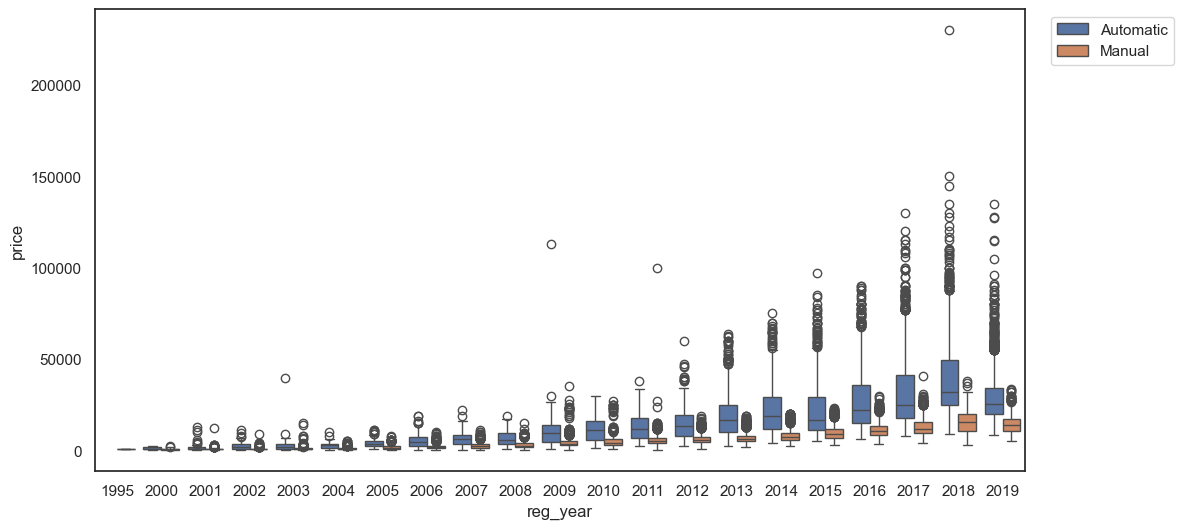

In [50]:
# create the boxplot and display
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="reg_year", y="price", hue="gearbox")
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1))
plt.show()

## Section 1 Predictive Modeling (50%)
Choose three machine learning algorithms that you have studied throughout the course to conduct
predictive analytics for used car price (i.e., the target variable is “price”). Your answer should include the
following aspects (discussion & operations in Python):

### Question 1. 
**Provide a brief introduction to the selected algorithms, explaining their nature, why they are appropriate for this project, and how they function. (15)** 

**Answer:**

In this project, I will apply three different machine learning algorithms to predict used car prices:

`Linear Regression (Ridge Regression)` `Decision Tree (CART)` and `Tree-Based Ensemble Learning (Random Forest)`.

All three are supervised learning algorithms used for regression tasks. The goal is to learn patterns from historical car data to forecast futurecar prices supporting business decisions. Since the target variable, price, is a  numeric value, all three selected algorithms will be applied as regression models to perform this predictive analytic


**1. Ridge Regression**: 

`Linear Regression` assumes a straight line relationship between the input varibale and the output vairbale and is a powerful machine learning algorithm to predict price based on past data. The algorithmen does that by learning coefficients, which are numbers that represent how much each variable affects the  final prediction. 

In this project, i use `Ridge Regression`, which works the same way as `Linear Regression`, but adds an penalty when the coefficient becomee to large. This reduce the risk of overfitting and makes it a more stable an reliable alternative. `Ridge Regression` works well in our context because some variables like `mileage`, `engine_size`, and `reg_year `often have linear relationships with car price. The model is simple to understand and offers a good interpretability, and therefore i pick it as my first model.

**2. Decision tree CART**: 

A `Decision Tree` is a machine learning model that makes predictions by following a sequence of conditional steps like a series of nested if-else statements. A decision tree consist of three nodes the root, Interior and Leaf node. The tree starts at a root node, continues through interior nodes (each representing a decision), and ends with a leaf node that contains the final predictiaion. 

The `CART` algorithm is a specific version of a decision tree that improves the process by using statistical criteria. For regression tasks, `CART` uses mean squared error (MSE) to find the best possible splits. It also always divide the tree into two branches (binary splits), which keeps the model consistent and easier to manage. `CART` furthermore support nummerical values making it ideal for predicting furutre car prices.

Unlike `Ridge`, this model does not assume linearity and can capture more complex relationships, such as how the effect of mileage may vary with brand or fuel type. However, a single tree can overfit, which leads to our next model.

**3. Random Forest**:

`Tree-based esemble` learning combines multiple decision trees to build a more accurate and stable prediction model. The main idea is that a group of trees can perform better when combined than any single tree on its own. The aim with this approach is to reduce overfitting in the prediction, which is a common issue in individual decision trees.

In the context of this project, `Random Forrest` is a strong choice because it builds many decision trees on different random subsets of the data and averages their predictions. This process reduces variance and improves generalization by having many simple trees vote together instead of relying on just one. `Random Forrest` is especially useful for capturing complex and non linear relationships between car features and price, without becoming too sensitive to outliers or noise in the dataset. However, compared to a single decision tree, `Random Forrest` is less interpretable and can also be computationally heavier when working with large datasets.

**Evaluation Metrics**   
To evaluate model performance, I will use the following metrics:  
- R² (R-squared): Shows how much of the variation in car prices the model can explain.
- MSE (Mean Squared Error):
Measures the average of the squared differences between predicted and actual prices.
- MAE (Mean Absolute Error):
Shows the average prediction error in euro terms.

### Question 2. 
**Describe and show the key stages of how you implement these algorithms in Python.(30%)**

Answer:

In [51]:
# Define input features and target variable
features = [ "reg_year", "runned_miles", "engin_size", "fuel_type", "gearbox", 
            "bodytype", "maker", "seat_num", "door_num"]

X = df[features]
y = df["price"]

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)


In [52]:
# Train and test split + adding test size and random seed number 
from sklearn.model_selection import train_test_split

random_seed_num= 20

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.4, random_state= random_seed_num)

To conduct predictive analytics for the target variable `price`, I selected a set of input features that are expected to influence car prices: `reg_year`, `runned_miles`, `engin_size`, `fuel_type`, `gearbox`, `bodytype`, `maker`, `seat_num` & `door_num`.

Since models like reggression algortims require numeric inputs, I used `pd.get_dummies()` to convert these categorical features into binary variables. This allows the models to use them properly in the training process.

Before training the models, I therefor encoded all categorical variables using one-hot encoding. This includes features like `fuel_type`, `gearbox`, `bodytype`, `maker`, `seat_num`, and `door_num`.

**1. Ridge Regression**:

In [53]:
# Import ridge regression with cross-validation
from sklearn.linear_model import RidgeCV

#import evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [54]:
# RidgeCV selects the best alpha using internal cross validation
ridge = RidgeCV(alphas=[0.5, 0.6, 0.7, 0.8])
ridge.fit(X_train, y_train)

# Predict on both training and test sets
ridge_preds_train = ridge.predict(X_train)
ridge_preds_test = ridge.predict(X_test)


In [55]:
print("Training Performance:\n")
print("Ridge - MSE: %0.2f" % mean_squared_error(y_train, ridge_preds_train))
print("Ridge - R²:  %0.3f" % r2_score(y_train, ridge_preds_train))

print("\n")

print("Test Performance:\n")
print("Ridge - MSE: %0.2f" % mean_squared_error(y_test, ridge_preds_test))
print("Ridge - R²:  %0.3f" % r2_score(y_test, ridge_preds_test))
print("Ridge - MAE: %0.2f" % mean_absolute_error(y_test, ridge_preds_test))

print("\nSelected Alpha:", ridge.alpha_)

Training Performance:

Ridge - MSE: 32140378.32
Ridge - R²:  0.722


Test Performance:

Ridge - MSE: 32649335.09
Ridge - R²:  0.721
Ridge - MAE: 3339.10

Selected Alpha: 0.8


The model was trained using internal cross validation to select the best regularization strength. `RidgeCV` automatically picked the optimal alpha 0,8 after testing it with the values [0.5, 0.6, 0.7, 0.8]. This way we balanced the models bias-variance tradeoff by preventing overfitting.

This result means that the model explains over 72% of the variation in car prices and typically predicts within €3,300 of actual sale prices. The MSE of ~18.2 million reflects a moderate level of error, acceptable for a linear model baseline.

**2. Decision Tree Regression (CART):**

In [56]:
# Import decision tree regressor (CART) library
from sklearn.tree import DecisionTreeRegressor

# Use random seed number
random_seed_num= 20

# Initialize and fit the model
cart = DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=random_seed_num)
cart.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=20)

In [57]:
#import evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error

# Predict on test set
cart_preds_test = cart.predict(X_test)
cart_preds_train = cart.predict(X_train)

print("Training Performance:\n")
print("Decision Tree - MSE: %0.2f" % mean_squared_error(y_train, cart_preds_train))
print("Decision Tree - R²:  %0.3f" % r2_score(y_train, cart_preds_train))

print("\n")

print("Test Performance:\n")
print("Decision Tree - MSE: %0.2f" % mean_squared_error(y_test, cart_preds_test))
print("Decision Tree - R²:  %0.3f" % r2_score(y_test, cart_preds_test))



Training Performance:

Decision Tree - MSE: 12683145.83
Decision Tree - R²:  0.890


Test Performance:

Decision Tree - MSE: 14596604.94
Decision Tree - R²:  0.875


I began by training the model CART using the default parameters from `import DecisionTreeRegressor` which gave the results: Training R²: 0.998 & Test R²: 0.941
  
Although R² closer to 1 is generally ideal, this gap between training and test scores signals overfitting. 

By default the parameters using `import DecisionTreeRegressor` is max_depth=None, min_samples_leaf=1 etc. 

To address this, I manually finetuned:
- max_depth = 5: restricts tree depth to limit complexity
- min_samples_leaf = 4: requires each leaf to have at least 4 samples to ensure stability

While the training performance dropped slightly, the generalization improved, leading to a more balanced and reliable model. 

This final result means the model explains around 88% of the variation in car prices. The MSE of ~14.6 million reflects the average squared difference between predicted and actual values, summarizing the models overall prediction error across the dataset.



**3. Random Forest**

In [58]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Use random seed number
random_seed_num= 20

# Initialize and fit the model
rf = RandomForestRegressor(random_state=random_seed_num)
rf.fit(X_train, y_train)



RandomForestRegressor(random_state=20)

In [59]:
#import evaluation metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Predict on train and test sets
rf_preds_train = rf.predict(X_train)
rf_preds_test = rf.predict(X_test)

print("Training Performance:\n")
print("Random Forest - MSE: %0.2f" % mean_squared_error(y_train, rf_preds_train))
print("Random Forest - R²:  %0.3f" % r2_score(y_train, rf_preds_train))

print("\n")

print("Test Performance:\n")
print("Random Forest - MSE: %0.2f" % mean_squared_error(y_test, rf_preds_test))
print("Random Forest - R²:  %0.3f" % r2_score(y_test, rf_preds_test))
print("Random Forest - MAE: %0.2f" % mean_absolute_error(y_test, rf_preds_test))


Training Performance:

Random Forest - MSE: 742301.79
Random Forest - R²:  0.994


Test Performance:

Random Forest - MSE: 5168196.21
Random Forest - R²:  0.956
Random Forest - MAE: 1135.96


The model explains over 95% of the variation in car prices and keeps average prediction errors within €1,200, which is excellent for pricing second-hand vehicles.
The low MSE confirms strong consistency and low variance, even across complex or high-dimensional inputs. This stability comes from the ensemble structure, where many decision trees vote together to reduce overfitting.

### Question 3. 
**Select the best model and discuss the business insights derived from it. Identify the variables/features that are important for prediction and explore the potential reasons behind these findings. Your analysis should be well-reasoned and may include relevant business theories or evidence from existing literature to support your statements, alongside the empirical findings from the provided data**

Answer:

Based on both training and test results, Random Forest was the strongest overall performer. It consistently delivered the best metrics across the board and achived:

- Test R² = 0.956 highest among all models
- MAE ≈ €1,135.96 lowest average error
- MSE ≈ 5.2 million lowest overall prediction error

To understand what drove the models predictions, I visualized the top 5 most important feature variable based on their effect on our taget variable `price`

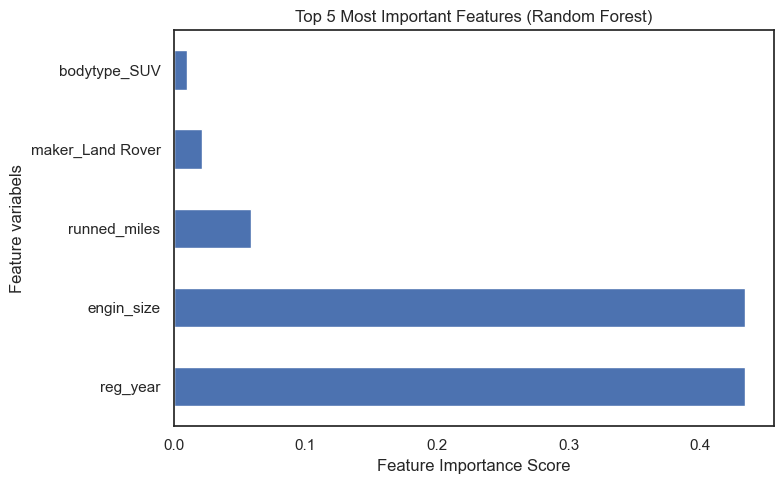

In [60]:
# Extract and visualize top 5 most important features from Random Forest
rf_top = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(5)

# import library 
import matplotlib.pyplot as plt

# Plot a horizontal bar chart showing the top 5 features ranked by importance
plt.figure(figsize=(8, 5))
rf_top.plot(kind="barh")
plt.title("Top 5 Most Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature variabels")
plt.tight_layout()



The two most important features `reg_year` and `engine_size` contributed over 85% of the models predictive logic. This confirms that vehicle age and engin type are the main drivers of used car prices.

The next most important feature was `runned_miles`, which ranked third in importance, while `maker_Land Rover` and `bodytype_SUV` had smaller influence on  `price`.

These findings align with well known patterns for car prices. Newer cars is less discounted and holds higher value, droven miles depreciate car value and larger engines are often linked to premium car prices. This alignment with actual market behavior gives the model credibility to support business decisions.

**From a business perspective, these insights enable data driven strategies and unlock new ways to improve decision making:**

For example, a car dealership could use this model to set prices more accurately. If they know a vehicle has a newer registration year and a larger engine, they can price it at the higher end of the range. On the other hand, older cars with high mileage may need discounts or different marketing approaches to sell.

The insights also help with stock planning. A dealership might focus on trading newer cars with larger engines, especially if there is a product market fit regarding time pr sale and profit margins. 

Another strong use case would be for online platforms to integrate the model into their website. This could add real value by helping users list their vehicles at fair, competitive prices 

Lastly, even though Random Forest is a complex model, it still gives enough transparency to see which features matter most. This helps business teams explain pricing decisions to customers or internal managers without needing to go deep into the technical side.

Lastly, even though Random Forest is a complex model, it still gives enough transparency to see which features matter most. That makes it easier for businesses to understand and explain the price flucuations to their customers.